In [1]:
import networkx as nx #library supporting networks
import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy import optimize
#make sure plots are embedded into the notebook
%pylab inline 
import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


In [2]:
nod=pd.read_csv('NODESLatLon.csv',index_col=1)
path= pd.read_csv("paths.csv")

In [3]:
nod.columns=(['nodenum','lat','lon'])

In [4]:
path['source'] = map(lambda x: x.replace(' ',''), path['source'])
path['dest'] = map(lambda x: x.replace(' ',''), path['dest'])
#nod['nodes'] = map(lambda x: x.replace(' ',''), nod['nodes'])

In [5]:
Railways=nx.Graph()
Railways.add_nodes_from(nod.index)
#create a dictionary of city locations
Pos={}
for c in nod.index:
    Pos[c]=(nod['lon'][c],nod['lat'][c])
print Pos['HOWRAHJN']

(88.339217000000005, 22.580947999999999)


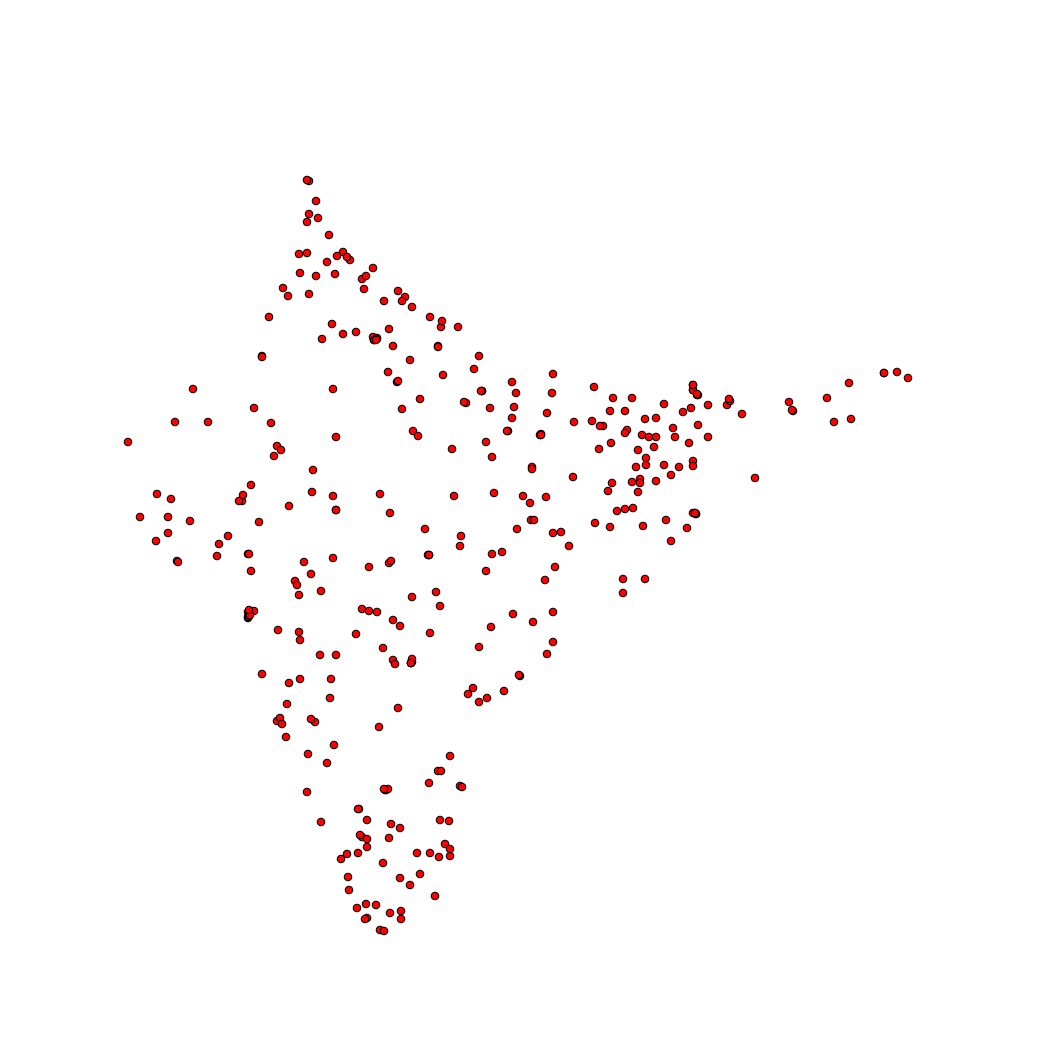

In [6]:
plt.figure(figsize = (14,14))
nx.draw(Railways,pos=Pos,with_labels=False,arrows=False,node_size=56)

In [7]:
en=len(path.index)
print en
edgelist=[0]*en
for k in range(0,en):
    edgelist[k]= (path['source'][k],path['dest'][k])
Railways.add_edges_from(edgelist)

2187


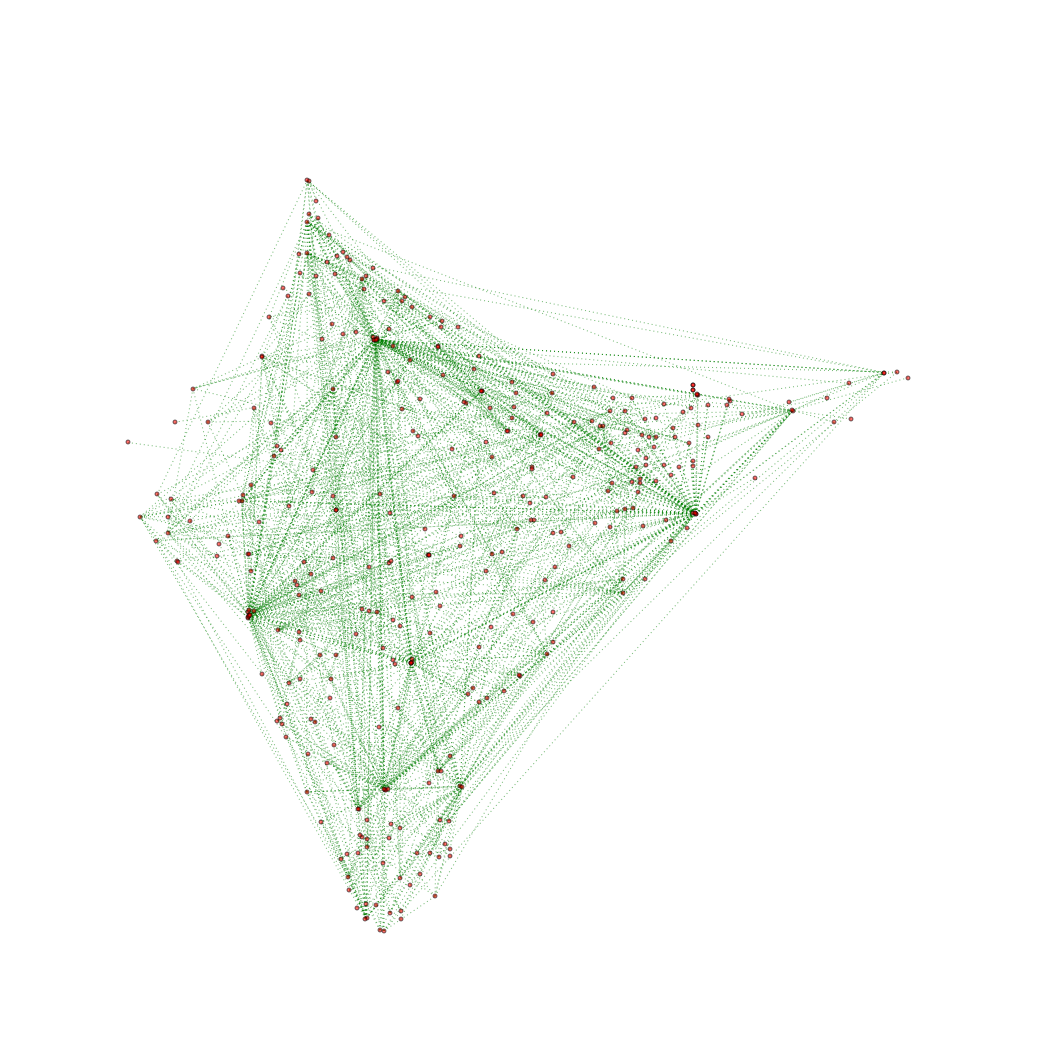

In [29]:
plt.figure(figsize = (14,14))
nx.draw(Railways,pos=Pos,with_labels=False,arrows=False,node_size=15,edge_color='green',style='dotted', alpha = 0.56)

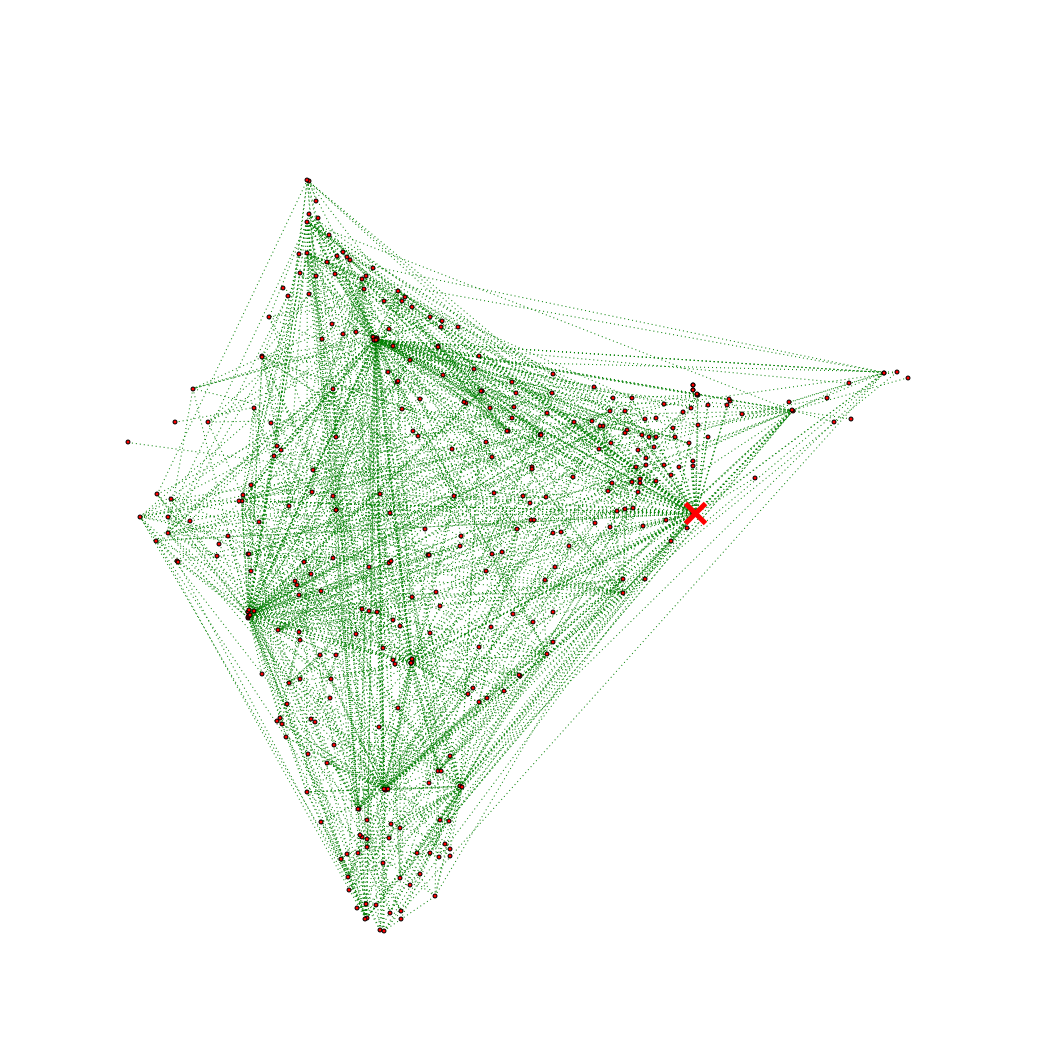

In [9]:
plt.figure(figsize = (14,14))
nx.draw(Railways,pos=Pos,with_labels=False,arrows=False,node_size=15,edge_color='green',style='dotted')
plt.plot(Pos['HOWRAHJN'][0],Pos['HOWRAHJN'][1],'xr',markersize=20,markeredgewidth=5)

In [10]:
def topdict(d,tn):
    ind=sorted(d, key=d.get, reverse=True)
    for i in range(0,tn):
       print('{0}|{1}:{2}'.format(i+1,ind[i],d[ind[i]]))

In [11]:
c1= nx.degree(Railways)
topdict(c1,10)

1|HOWRAHJN:68
2|NEWDELHI:48
3|LOKMANYATILAKT:46
4|CHENNAICENTRAL:42
5|YESVANTPURJN:39
6|MUMBAICST:33
7|SECUNDERABADJN:33
8|PUNEJN:32
9|AHMEDABADJN:32
10|JAMMUTAWI:31


In [12]:
c2= nx.eigenvector_centrality(Railways)
topdict(c2,10)

1|HOWRAHJN:0.275527717266
2|CHENNAICENTRAL:0.224605874594
3|NEWDELHI:0.213179694338
4|LOKMANYATILAKT:0.199091074742
5|AHMEDABADJN:0.186251400947
6|YESVANTPURJN:0.182533006222
7|HNIZAMUDDIN:0.168627665995
8|PUNEJN:0.16764308199
9|JAMMUTAWI:0.16033492714
10|PURI:0.159576989871


In [13]:
nx.number_connected_components(Railways)
FLC=sorted(nx.connected_components(Railways), key=len, reverse=True)
RCG=list(nx.connected_component_subgraphs(Railways, copy=True))[0]
c3 = nx.current_flow_betweenness_centrality(RCG)
topdict(c3,10)

1|HOWRAHJN:0.179544117088
2|NEWDELHI:0.109405168355
3|LOKMANYATILAKT:0.10671055416
4|CHENNAICENTRAL:0.0989476319242
5|DELHI:0.0914095173906
6|SECUNDERABADJN:0.0812762066318
7|YESVANTPURJN:0.0811661014901
8|CHENNAIEGMORE:0.0777487821477
9|MUMBAICST:0.0767572137171
10|TIRUPATI:0.0668442859339


In [14]:
c4 = nx.closeness_centrality(RCG)
topdict(c4,10)

1|HOWRAHJN:0.472727272727
2|CHENNAICENTRAL:0.451871657754
3|LOKMANYATILAKT:0.446499339498
4|NEWDELHI:0.445910290237
5|AHMEDABADJN:0.434447300771
6|YESVANTPURJN:0.428390367554
7|SECUNDERABADJN:0.425692695214
8|JAMMUTAWI:0.425692695214
9|PURI:0.423558897243
10|MUMBAICST:0.420921544209


In [15]:
c5 = nx.pagerank(Railways,0.85)
topdict(c5,10)

1|HOWRAHJN:0.0278550559208
2|NEWDELHI:0.0187917372527
3|LOKMANYATILAKT:0.0179238578082
4|CHENNAICENTRAL:0.0160769771577
5|YESVANTPURJN:0.0145447297239
6|SECUNDERABADJN:0.0135031288479
7|DELHI:0.013363817593
8|MUMBAICST:0.0127712255267
9|CHENNAIEGMORE:0.0117794945799
10|PUNEJN:0.0116999280436


In [16]:
def visualize_path(path, graph):
    plt.figure(figsize = (14,18))
    nx.draw(graph, pos = Pos, with_labels = False, alpha = 0.63, font_size = 18, 
            node_size = 14, font_color = 'r', edge_color = 'g', style = 'dotted')
    x=[Pos[v][0] for v in path]
    y=[Pos[v][1] for v in path]
    plt.plot(x,y,'bo-', lw = 2)
    plt.plot([x[0],x[-1]],[y[0],y[-1]],'bs',markersize=7)

In [17]:
shrtpath_a = nx.shortest_path(Railways, Railways.nodes()[1], Railways.nodes()[20])
print len(shrtpath_a)

4


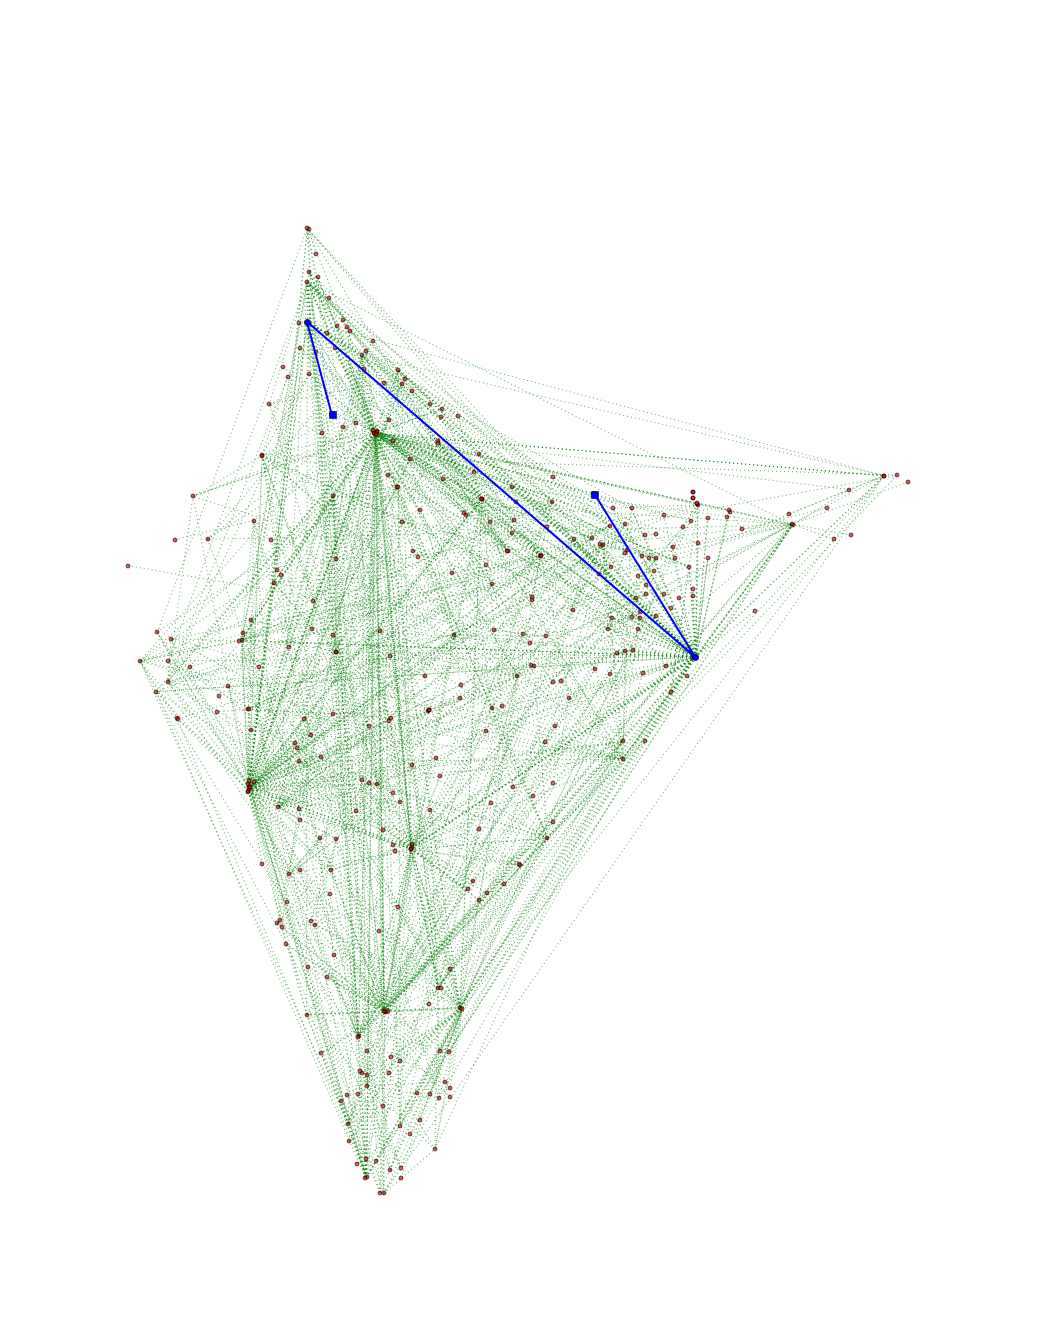

In [18]:
visualize_path(shrtpath_a, Railways)

In [19]:
from math import sin, cos, sqrt, atan2, radians
def geodist(lon1,lat1,lon2,lat2):
    lat1 = radians(lat1)
    lon1 = radians(lon1)  
    lat2 = radians(lat2)
    lon2 = radians(lon2)
    R = 6373.0
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

In [20]:
nx.set_edge_attributes(Railways, 'dist', 0)

In [21]:
for e in Railways.edges():
    Railways[e[0]][e[1]]['dist']=geodist(Pos[e[0]][0],Pos[e[0]][1],Pos[e[1]][0],Pos[e[1]][1])

In [22]:
shrtpaths = nx.all_pairs_shortest_path(Railways)

In [23]:
nodes = []
for i in nod.index:
    nodes.append(i)

In [24]:
highest = None
lowest = None
length = 0
length1 = 0
k = 0
s=[]
d=[]

l,l1 = [],[]
shrt = pd.DataFrame()
shrt['source'] =[0]*len(nodes)
shrt['dest']= [0]*len(nodes)
shrt['dist'] = [0]*len(nodes)
for a in shrtpaths:
    #print a
    for b in shrtpaths[a]:
        #print b 
        if len(shrtpaths[a][b]) > length:
            highest = (a,b)
            length = len(shrtpaths[a][b])
            #l.append(length)
        #shrt['source'][k]=a
    length1 = len(shrtpaths[a][b])
    s.append(a)
    d.append(b)
    l.append(length1)
        
        #shrt['dest'][k]=b
        #shrt['dist'][k]=length1
    #k=k+1
            
print 'The highest shortest path goes through nodes', shrtpaths[highest[0]][highest[1]]

The highest shortest path goes through nodes ['INDOREJNMG', 'AKOLAJN', 'KACHEGUDA', 'CHENNAIEGMORE', 'DIBRUGARH', 'DELHI', 'ALIPURDUARJN', 'DHUBRI', 'SILGHATTOWN']


In [25]:
shrt['source']= s
shrt['dest'] = d
shrt['dist']=l

In [26]:
shrt.sort(['dist'])

,source,dest,dist
316,SAWANTWADIROAD,SAWANTWADIROAD,1
268,IZZATNAGAR,IZZATNAGAR,1
167,BULANDSHAHR,BULANDSHAHR,1
182,MARWARJN,MARWARJN,1
231,SRINAGAR,SRINAGAR,1
53,DIVA,SAWANTWADIROAD,2
164,ALLAHABADJN,BULANDSHAHR,2
23,SINGRAULI,VARANASIJN,2
68,NIZAMABAD,LOKMANYATILAKT,2
197,KURSEONG,TOKURSEONG,2


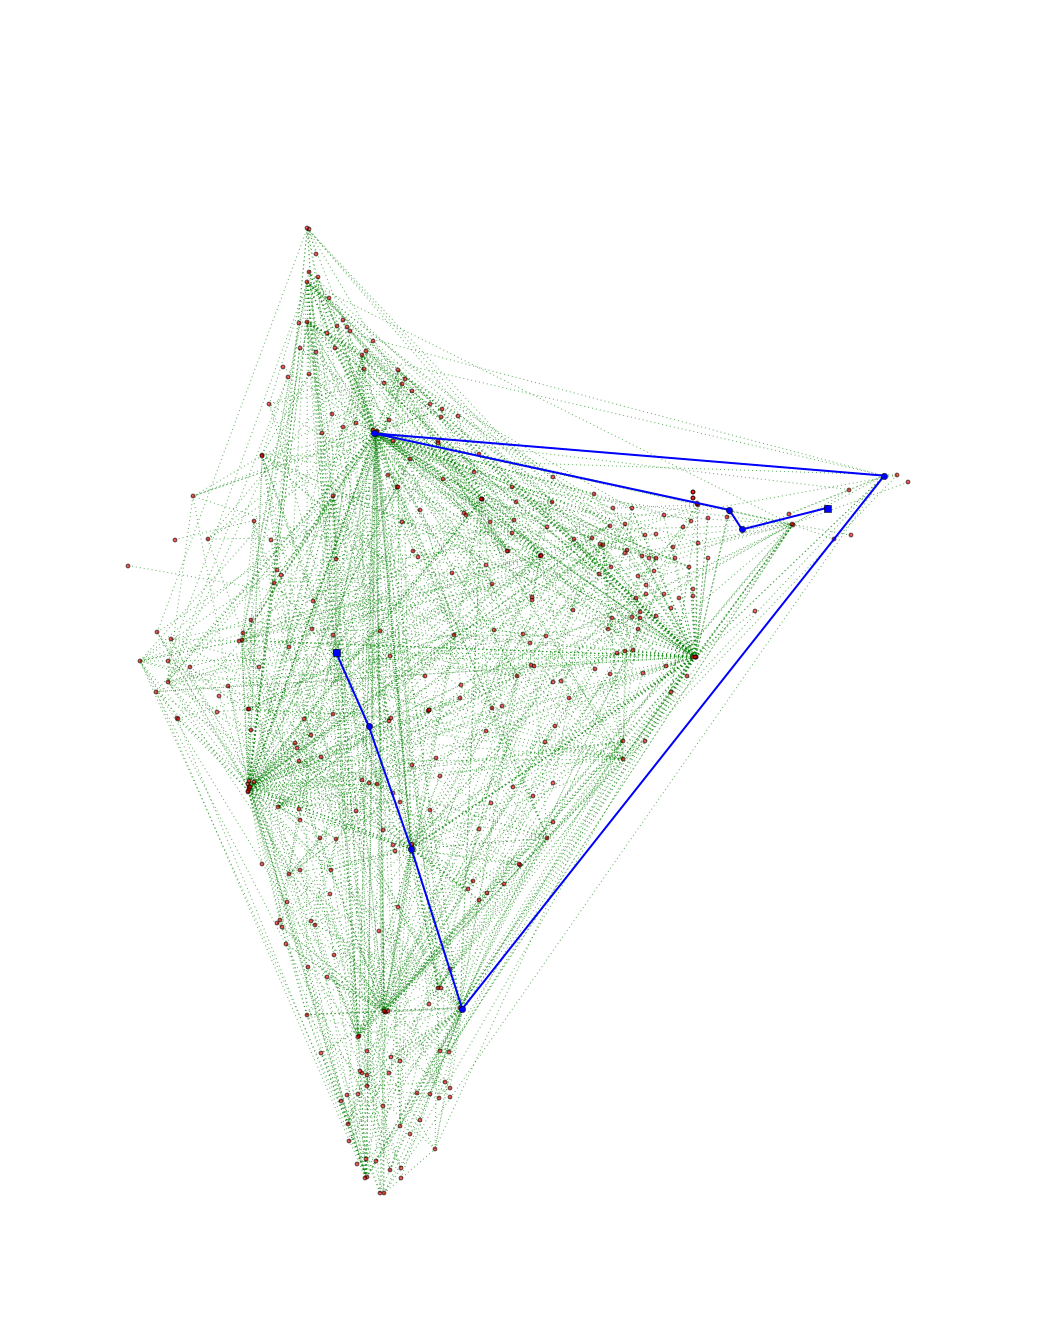

In [27]:
visualize_path(shrtpaths[highest[0]][highest[1]], Railways)